In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras 

## DataSet

In [7]:
# Load the Fashion-MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

# Loading the training and test split of the Fashion MNIST dataset

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Each training_images / test_image will have an array of the pixels of size 28 x 28, which is a 2d matrix
# it means training_images and test_images are 3d arrays

LABEL:  {8}

ONE IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   1   0   2   0   0  65 103 103  96  91  66   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   2   1   0   2   2   0   0   0 135 108  28   6   4  21  85 134   8   0   0   0   0   0   0   0]
 [  0   0   0   0   1   3   0   0   3   0   9 166  39   0   0   0   0   0   0  19 113  11   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0 154 104   0  10   3   4   5   1   8   0  98 179   0   0   1   0   0   0]
 [  0   0   0   3   7   0   0   0   0   0  70  11   0   0   0   0   0   0   0   0   0  41   0   0   0   0   1   0]
 [  2   0   1   0   0   0   0  72 136  45 2

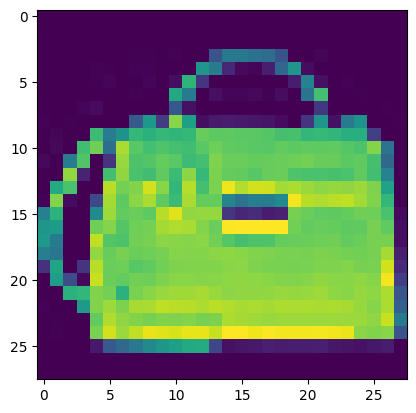

In [8]:
# You can put between 0 to 59999 here
index = 35482

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print('LABEL: ',{training_labels[index]})
print(f'\nONE IMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

## Normalization

In [9]:
''' If you are training a neural network especially in image processing,
 for various reasons it will usually learn better if you scale all values 
 to between 0 and 1. It\'s a process called normalization'''

# Normalizing the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [10]:
# Making Dictionary of the Labels to its relative class
items = {
    0 : 'Shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boot',
}

## Neural Network

In [18]:
# Build the classification model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
'''
 we have three layers of our model
 first layer is input layer taking input of image and changing it into array
 second layer hidden layer doing all the work
 third layer is storing the output according to the label
'''

'\n we have three layers of our model\n first layer is input layer taking input of image and changing it into array\n second layer hidden layer doing all the work\n third layer is storing the output according to the label\n'

## Softmax Regression

In [12]:
# Softmax activation function 
# Example is about its working hiddeosly in the second layer

# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


## CallBacks class

In [22]:
'''
Ends the training when the loss falls below 0.4
it also helps the model to avoid overtraining
Args:
      -> epoch (integer) - index of epoch (required but unused in the function definition below)
      -> logs (dict) - metric results from the training epoch
'''
class myCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:    
        if( logs.get('loss') < 0.4):
            print("\n\nLoss is lower than 0.4, so cancelling the training")
            self.model.stop_training = True
            
# Instantiating the class
callback = myCallBacks() 

##  Model Compilation

In [20]:
# Model compilation with optimizer to choose next close option
model.compile(
        optimizer = tf.optimizers.Adam(),
        loss = 'sparse_categorical_crossentropy',
        metrics=['accuracy']
)

## Model Training

In [23]:
model.fit(training_images, training_labels, epochs=15,callbacks=[callback])

Epoch 1/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8808

Loss is lower than 0.4, so cancelling the training
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3208 - accuracy: 0.8808


##  Model Accuracy

In [108]:
# Testing the model accuracy with an unseen data

model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8884


[0.33889251947402954, 0.8884000182151794]

## Model Predictions

Prediction | Given Image is of a " Pullover "


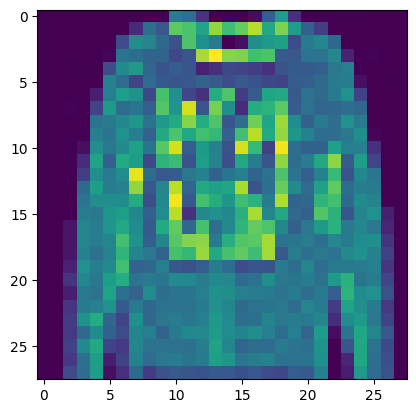

In [109]:
index = 500
plt.imshow(test_images[index])
print(f'Prediction | Given Image is of a " {items[test_labels[index]]} "')

Prediction | Given Image is of a " Bag "


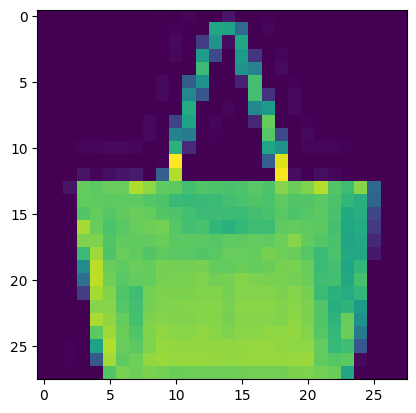

In [110]:
index = 2789
plt.imshow(test_images[index])
print(f'Prediction | Given Image is of a " {items[test_labels[index]]} "')


Prediction | Given Image is of a " Bag "


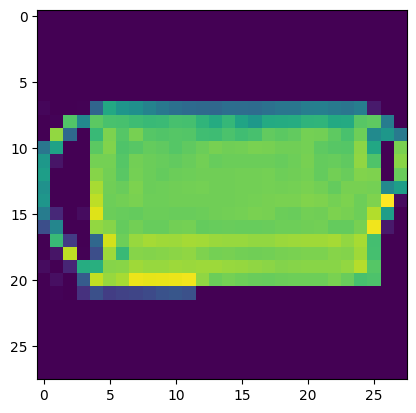

In [111]:
index = 9923
plt.imshow(test_images[index])
print(f'Prediction | Given Image is of a " {items[test_labels[index]]} "')


Prediction | Given Image is of a " Trouser "


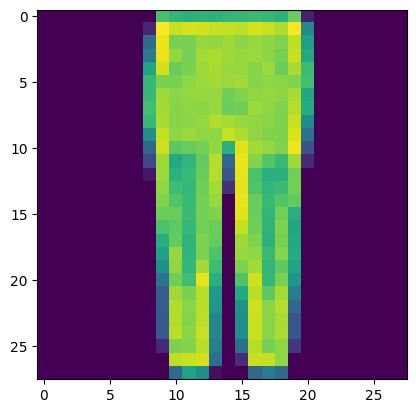

In [112]:
index = 3000
plt.imshow(test_images[index])
print(f'Prediction | Given Image is of a " {items[test_labels[index]]} "')


Prediction | Given Image is of a " Ankle Boot "


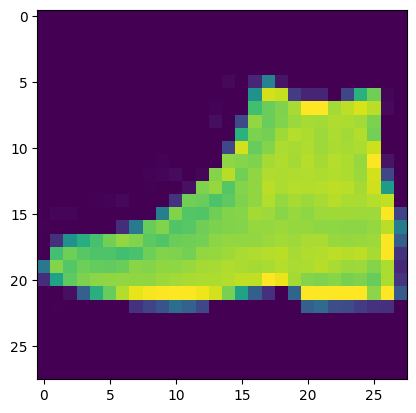

In [113]:
index = 1962
plt.imshow(test_images[index])
print(f'Prediction | Given Image is of a " {items[test_labels[index]]} "')
